In [ ]:
using DataFrames, CSV, Plots, StatsPlots
#Change the name of the excel file
df = CSV.read("risk_aversion_results_O4T720_synthetic_data.csv", DataFrame)

Row,δ,Ψ,objective,ζ_total,max_u,PV,Wind,Gas,Battery_P,Battery_E,LDES_P,LDES_E
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.1,5.69504e8,61.3995,632.579,70.9521,161.74,18.3514,0.00167273,0.00203975,73.5426,741.923
2,0.8,0.1,4.557e8,4.8244e5,2.76404e-6,70.9462,161.74,18.3525,0.00129007,0.00157261,73.5411,741.925
3,0.5,0.1,2.84994e8,4.82441e5,7.87615e-7,70.9227,161.74,18.3583,0.0014737,0.00179516,73.5172,741.883
4,0.2,0.1,1.14287e8,4.82445e5,3.42947e-7,70.8202,161.738,18.3822,0.00253591,0.00309271,73.432,741.761
5,0.0,0.1,4.88267e5,4.88267e5,5.39167e-7,76.4133,143.543,1.52121,0.773832,0.872462,67.7825,605.46


1. Objective Value vs. δ (for each Ψ)

Why: Shows how the central planner sacrifices expected profit to gain robustness (CVaR) as δ ↓.

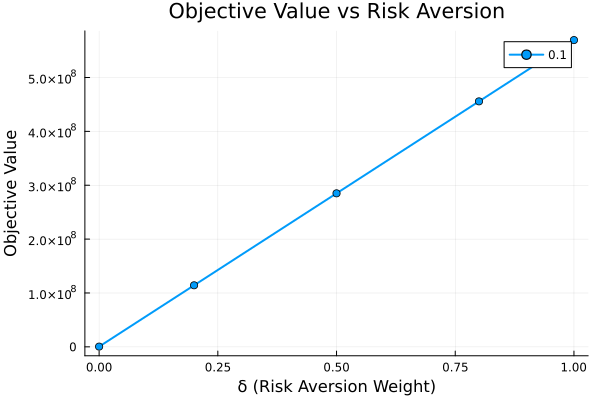

In [ ]:
@df df plot(:δ, :objective,
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Objective Value",
    title = "Objective Value vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :circle
)

 2. ζ_total vs. δ (for each Ψ)
 
Why: Shows how the VaR (worst-case welfare) shifts under different δ — should become more conservative.

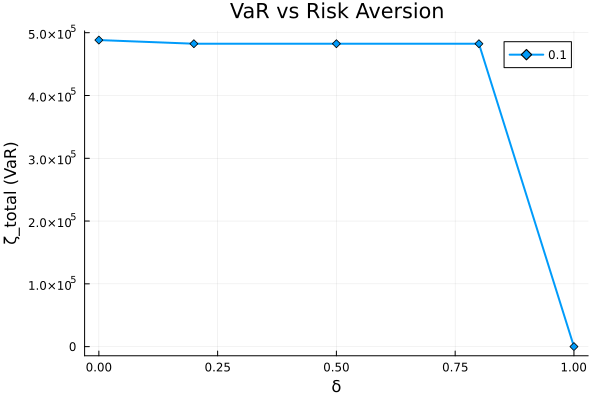

In [ ]:
@df df plot(:δ, :ζ_total,
    group = :Ψ,
    xlabel = "δ",
    ylabel = "ζ_total (VaR)",
    title = "VaR vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :diamond
)


3. max_u (worst-case shortfall) vs. δ

Why: See if any scenario dips below ζ_total — this helps confirm if CVaR is active.

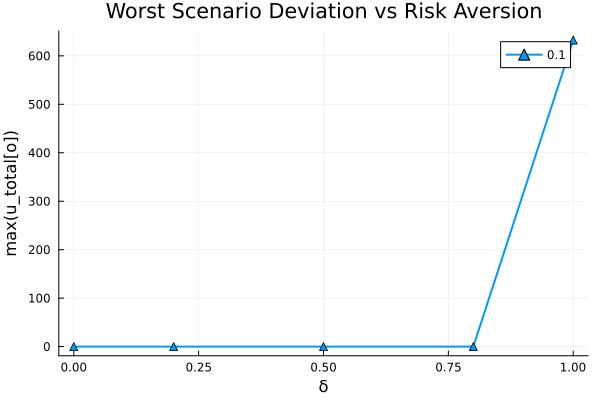

In [ ]:
@df df plot(:δ, :max_u,
    group = :Ψ,
    xlabel = "δ",
    ylabel = "max(u_total[o])",
    title = "Worst Scenario Deviation vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :utriangle
)


4. Investment by Technology vs. δ

Gas, Wind, PV, Storage — shows how the planner shifts the capacity mix to hedge risk.

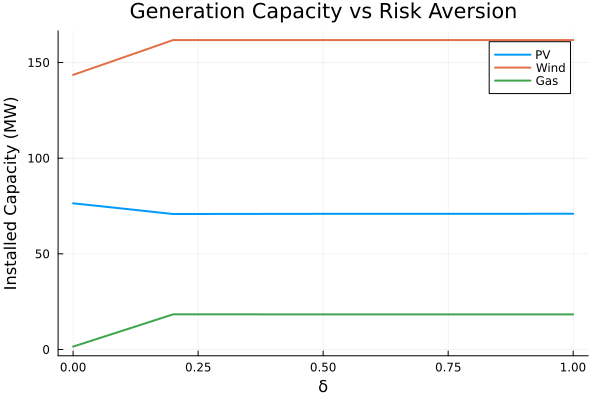

In [ ]:
@df df plot(:δ, [:PV :Wind :Gas],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "Installed Capacity (MW)",
    title = "Generation Capacity vs Risk Aversion",
    label = ["PV" "Wind" "Gas"],
    legend = :topright,
    lw = 2
)


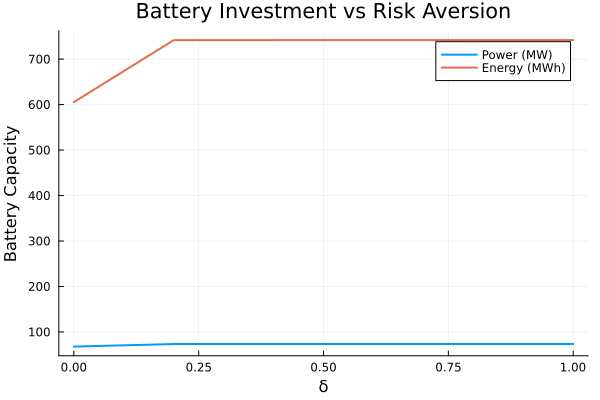

In [ ]:
@df df plot(:δ, [:Battery_P :Battery_E],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "Battery Capacity",
    title = "Battery Investment vs Risk Aversion",
    label = ["Power (MW)" "Energy (MWh)"],
    lw = 2,
    legend = :topright
)

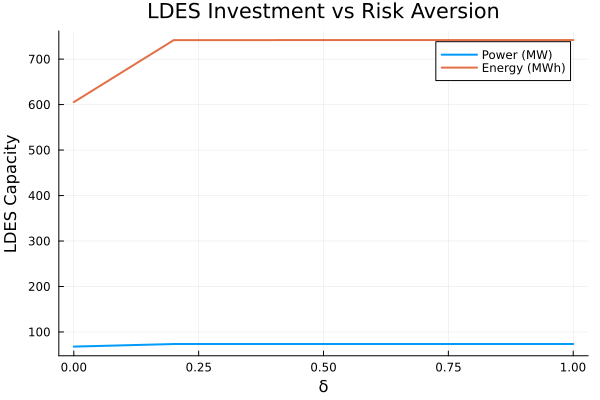

In [ ]:
@df df plot(:δ, [:LDES_P :LDES_E],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "LDES Capacity",
    title = "LDES Investment vs Risk Aversion",
    label = ["Power (MW)" "Energy (MWh)"],
    lw = 2,
    legend = :topright
)

5. Total Firm Capacity vs δ (Grouped by Ψ)

This will show how the model adds Gas + Battery_Power as δ ↓ to hedge against uncertain renewables.

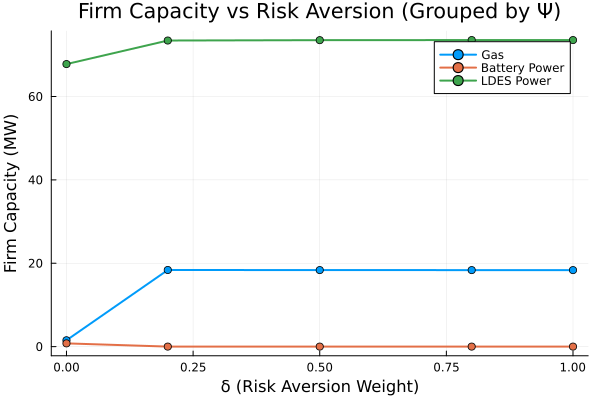

In [ ]:
@df df plot(:δ,
    [:Gas :Battery_P :LDES_P],
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Firm Capacity (MW)",
    title = "Firm Capacity vs Risk Aversion (Grouped by Ψ)",
    label = ["Gas" "Battery Power" "LDES Power"],
    lw = 2,
    markershape = :circle,
    legend = :topright
)

6. Total Installed Capacity vs δ (Grouped by Ψ)

This will show a high-level view of whether the system becomes more robust (overbuilt) or more streamlined (leaner) as the planner becomes more risk-averse.

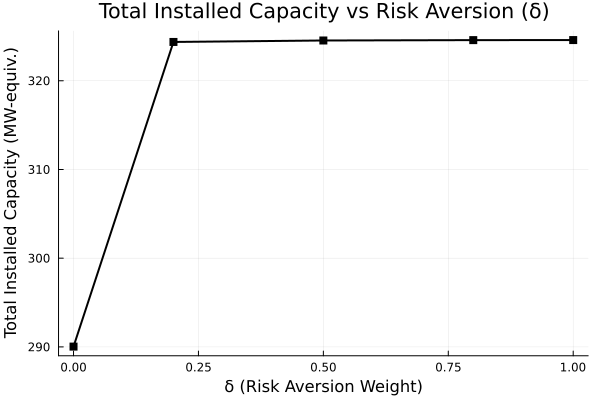

In [ ]:
df.total_capacity = df.PV + df.Wind + df.Gas + df.Battery_P + df.LDES_P

@df df plot(:δ, :total_capacity,
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Total Installed Capacity (MW-equiv.)",
    title = "Total Installed Capacity vs Risk Aversion (δ)",
    legend = false,
    lw = 2,
    markershape = :rect,
    markercolor = :black,
    linecolor = :black,
    grid = true
)


Plot for complete markets

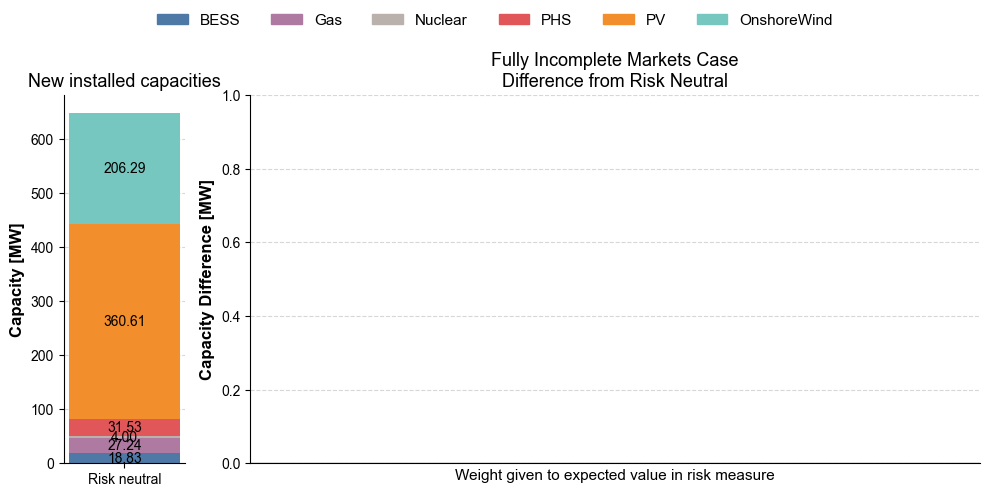

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df = pd.read_csv("ADMM_risk_aversion_results_O30_T672tun.csv")

# === Filter relevant columns ===
capacity_cols = ['PV', 'Wind', 'Gas', 'Nuclear', 'BESS_P', 'LDES_PHS_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Gas', 'Nuclear', 'LDES_PHS_P', 'PV', 'Wind']
labels = ['BESS', 'Gas', 'Nuclear', 'PHS', 'PV', 'OnshoreWind']
colors = {
    'BESS_P': '#4e79a7',       # Blue
    'Gas': '#af7aa1',          # Violet
    'Nuclear': '#bab0ac',      # Gray
    'LDES_PHS_P': '#e15759',   # Red
    'PV': '#f28e2b',           # Orange
    'Wind': '#76c7c0',         # Teal
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 6]})

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.3
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 0.1:
        ax1.text(0, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='black', fontsize=10)
    bottom += value
ax1.set_xticks([0])
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=13, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0:
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9)
            bottom_pos[i] += diff
        else:
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9)
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.1f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight given to expected value in risk measure", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Fully Incomplete Markets Case\nDifference from Risk Neutral", fontsize=13, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

# === Legend ===
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=11, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
